In [9]:
import pandas as pd

In [10]:
X = pd.read_csv("/content/wheat.csv", index_col='id')
X.head()


,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [11]:
y = X.wheat_type.copy()
X.drop(['wheat_type'], axis=1, inplace=True)

In [13]:
y_original = y

In [15]:
y = y.astype("category").cat.codes

In [17]:

X.fillna(X.mean(), inplace=True)


In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
random_state=1)

In [22]:
from sklearn import preprocessing
normaliser = preprocessing.Normalizer().fit(X_train)

In [24]:

X_train_normalised = normaliser.transform(X_train)
X_train = pd.DataFrame(X_train_normalised)
X_test_normalised = normaliser.transform(X_test)
X_test = pd.DataFrame(X_test_normalised)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Normalizer was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.decomposition import PCA

In [28]:
pca_reducer = PCA(n_components=2).fit(X_train_normalised)
X_train_pca = pca_reducer.transform(X_train_normalised)
X_test_pca = pca_reducer.transform(X_test_normalised)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_pca, y_train)


KNeighborsClassifier(n_neighbors=9)

In [34]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [48]:
import numpy as np
def plotDecisionBoundary(model, X, y, colors, padding=0.6, resolution = 0.0025):
     fig = plt.figure(figsize=(8,6))
     ax = fig.add_subplot(111)

     x_min, x_max = X[:, 0].min(), X[:, 0].max()
     y_min, y_max = X[:, 1].min(), X[:, 1].max()
     x_range = x_max - x_min
     y_range = y_max - y_min
     x_min -= x_range * padding
     y_min -= y_range * padding
     x_max += x_range * padding
     y_max += y_range * padding
     xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                    np.arange(y_min, y_max, resolution))
     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
     Z = Z.reshape(xx.shape)
     ax.contourf(xx, yy, Z, cmap=plt.cm.rainbow)
     fig.tight_layout(pad=2)
     for label in np.unique(y):
         indices = np.where(y == label)
     ax.scatter(X[indices, 0], X[indices, 1], c=colors[label], alpha=0.8)

     p = model.get_params()
     fig.suptitle('Decision boundaries, K = ' + str(p['n_neighbors']))

In [51]:
for label in np.unique(y_original):
    print(label)

canadian
kama
rosa


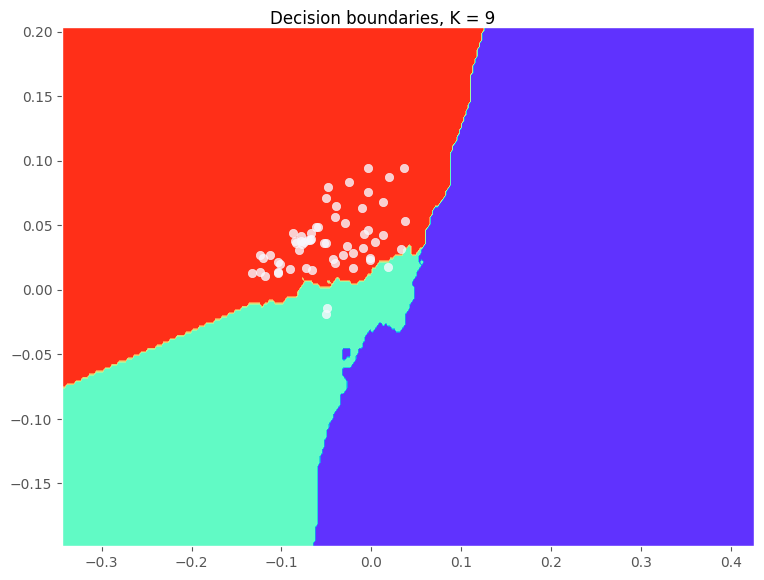

In [53]:
myColours = ['royalblue','forestgreen','ghostwhite']
plotDecisionBoundary(knn, X_train_pca, y_train, colors = myColours)

In [55]:

print(knn.score(X_test_pca, y_test))


0.9047619047619048


In [64]:
X = pd.read_csv("/content/breast-cancer-wisconsin.csv", header=None,
names=['sample', 'thickness', 'size', 'shape', 'adhesion',
'epithelial', 'nuclei', 'chromatin', 'nucleoli',
'mitoses', 'status'], index_col='sample', na_values='?')


In [65]:
X.head()

,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,status
sample,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


In [66]:
y = X.status.copy()
X.drop(['status'], axis=1, inplace=True)

In [70]:
if X.isnull().values.any() == True:
      print("Preprocessing data: substituted all NaN with mean value")
      X.fillna(X.mean(), inplace=True)
else:
      print("Preprocessing data: No NaN found!")

Preprocessing data: substituted all NaN with mean value


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.5, random_state=7)

In [74]:
reducers = [False, True]
weights = ['uniform', 'distance']

In [76]:
scalers = [preprocessing.Normalizer, preprocessing.StandardScaler,
preprocessing.MinMaxScaler, preprocessing.RobustScaler]

In [77]:
from sklearn.decomposition import PCA
from sklearn import manifold

In [79]:
separator = "--------------------------------------"
print('*** Starting K-neighbours classifier')
print(separator)
bestScore = 0.0

*** Starting K-neighbours classifier
--------------------------------------


In [81]:
for scaler in scalers:
    print("* Scaler = ", scaler)
    scalerTrained = scaler().fit(X_train)
    X_train_scaled = scalerTrained.transform(X_train)
    X_test_scaled = scalerTrained.transform(X_test)
    print("PCA? | K | Weight | Score")
    print(separator)

* Scaler =  <class 'sklearn.preprocessing._data.Normalizer'>
PCA? | K | Weight | Score
--------------------------------------
* Scaler =  <class 'sklearn.preprocessing._data.StandardScaler'>
PCA? | K | Weight | Score
--------------------------------------
* Scaler =  <class 'sklearn.preprocessing._data.MinMaxScaler'>
PCA? | K | Weight | Score
--------------------------------------
* Scaler =  <class 'sklearn.preprocessing._data.RobustScaler'>
PCA? | K | Weight | Score
--------------------------------------


In [82]:
reducer = None
for isPCA in reducers:
    if isPCA:
       reducer = PCA(n_components=2).fit(X_train_scaled)
    else:
      reducer = manifold.Isomap(n_neighbors=10, n_components=2).fit(X_train_scaled)

In [84]:
X_train_reduced = reducer.transform(X_train_scaled)
X_test_reduced = reducer.transform(X_test_scaled)

In [87]:
for k in range(1,16):
      for weight in weights:
        knmodel = KNeighborsClassifier(n_neighbors = k, weights = weight)
        knmodel.fit(X_train_reduced, y_train)
        currentScore = knmodel.score(X_test_reduced, y_test)
        print(f"{isPCA} | {k} | {weight} | {currentScore}")

        if (currentScore > bestScore):
             bestScore = currentScore
             bestPCA = isPCA
             bestK = k
             bestWeight = weight
             bestScaler = scaler


True | 1 | uniform | 0.94
True | 1 | distance | 0.94
True | 2 | uniform | 0.94
True | 2 | distance | 0.94
True | 3 | uniform | 0.96
True | 3 | distance | 0.9542857142857143
True | 4 | uniform | 0.9457142857142857
True | 4 | distance | 0.9542857142857143
True | 5 | uniform | 0.9571428571428572
True | 5 | distance | 0.9571428571428572
True | 6 | uniform | 0.9542857142857143
True | 6 | distance | 0.9571428571428572
True | 7 | uniform | 0.96
True | 7 | distance | 0.9571428571428572
True | 8 | uniform | 0.96
True | 8 | distance | 0.9571428571428572
True | 9 | uniform | 0.9628571428571429
True | 9 | distance | 0.9571428571428572
True | 10 | uniform | 0.96
True | 10 | distance | 0.9571428571428572
True | 11 | uniform | 0.9628571428571429
True | 11 | distance | 0.9571428571428572
True | 12 | uniform | 0.96
True | 12 | distance | 0.9571428571428572
True | 13 | uniform | 0.9628571428571429
True | 13 | distance | 0.9571428571428572
True | 14 | uniform | 0.96
True | 14 | distance | 0.9571428571428